In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from random import shuffle
from tqdm import tqdm

In [224]:
train_path = './pca_analysis/L_40/'
def process_data(data_path):
    data = []
    labels = []
    for filename in tqdm(os.listdir(data_path)):
        T,_ = filename.split('_')
        path = os.path.join(data_path,filename)
        img = np.load(path)
        data.append(img.flatten())
        labels.append(float(T))
    return np.array(data), np.array(labels)
data, labels = process_data(train_path)    
temperatures = np.arange(1.6,2.9,0.1)

100%|██████████| 1300/1300 [00:00<00:00, 5543.41it/s]


In [234]:
train_path = './data/train/'

def process_data(data_path,*args):
    data = []
    labels = []
    if args: # The args are a list if directories in the data path that separate the classes/categories
        for category in args:
            for i in tqdm(os.listdir(data_path + category)):
                _,T,_ = i.split('_')
                path = os.path.join(data_path, category,i)
                img = np.load(path)
                data.append(img.astype(dtype='float32').flatten())
                labels.append(float(T))
        return np.array(data), np.array(labels)      
data, labels = process_data(train_path,'low','high')  
temperatures = np.concatenate((np.arange(1.5,3.2,0.1),np.arange(1.75,3.05,0.1))) 

100%|██████████| 8000/8000 [00:02<00:00, 3752.60it/s]


In [228]:
def plot_pca(data, labels, temperatures):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Temperature')
    plt.title('PCA of 2D Ising Model Configurations')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

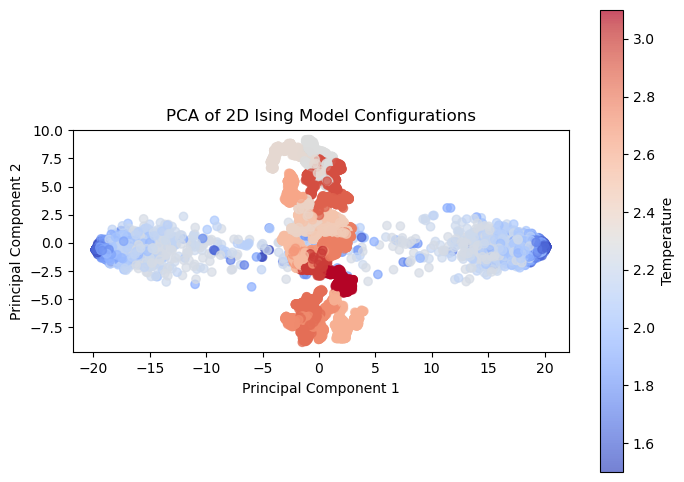

In [230]:
plot_pca(data, labels, temperatures)

In [150]:
def plot_explained_variance_ratios(data):
    pca = PCA(n_components=10)
    data_pca = pca.fit_transform(data)
    explained_variance_ratios = pca.explained_variance_ratio_
    
    # Plot the explained variance ratios
    plt.plot(explained_variance_ratios, marker='o')
    plt.title("Explained Variance Ratio")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.show()

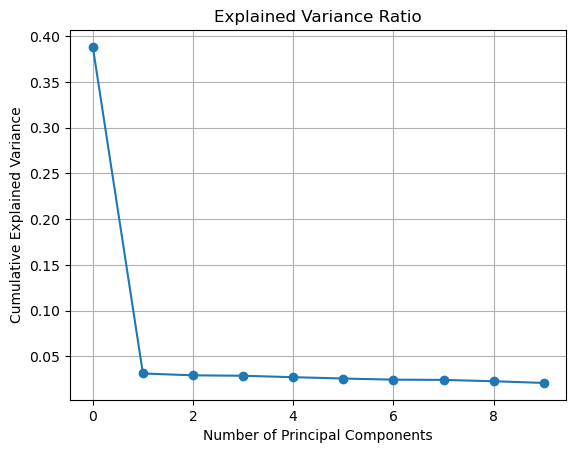

In [152]:
plot_explained_variance_ratios(data)

In [162]:
def compute_first_pca_weight(ising_data, lattice_size=20):
    # Perform PCA
    pca = PCA(n_components=1)  # Only compute the first principal component
    pca.fit(ising_data)

    # Get the weight (principal component) for the first principal component
    first_pc_weight = pca.components_[0].reshape(lattice_size, lattice_size)

    # Plot the first principal component's weight
    plt.figure(figsize=(6, 6))
    plt.imshow(first_pc_weight, cmap='seismic', interpolation='none',vmin=0, vmax=0.06)
    plt.title("First Principal Component Weight")
    plt.colorbar()
    plt.show()

    # Return the first principal component's weight for further analysis
    # return first_pc_weight

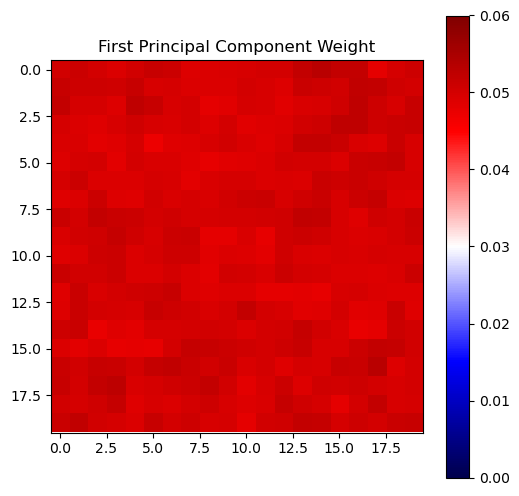

array([[0.05027807, 0.05101507, 0.04996333, 0.04910049, 0.05035183,
        0.05154016, 0.05094727, 0.04885988, 0.04916228, 0.04931235,
        0.04945698, 0.05013961, 0.04992536, 0.05201763, 0.05310314,
        0.05185799, 0.05199615, 0.0479532 , 0.0498411 , 0.05067342],
       [0.05137723, 0.05064387, 0.0506314 , 0.05047992, 0.05150374,
        0.04964345, 0.04984947, 0.04915543, 0.04909829, 0.04900829,
        0.04994477, 0.04958356, 0.04884225, 0.05130842, 0.05075041,
        0.05033866, 0.05226303, 0.05186344, 0.05039921, 0.04993987],
       [0.05183788, 0.04987531, 0.04978272, 0.04886455, 0.05237347,
        0.05146024, 0.04967652, 0.05003867, 0.04782232, 0.04830793,
        0.04986371, 0.04953503, 0.04849689, 0.04925038, 0.04950926,
        0.0504034 , 0.05249478, 0.05084406, 0.04966987, 0.05145323],
       [0.04973388, 0.04915719, 0.04852604, 0.04947442, 0.05054973,
        0.04964801, 0.04940193, 0.050083  , 0.04880363, 0.05007253,
        0.04849651, 0.0489683 , 0.0492008 , 0

In [164]:
compute_first_pca_weight(data)